In [256]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter
import numpy as np 
import pandas as pd 
import os 
import random
from cycler import cycler as cy 
from collections import defaultdict 

In [178]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"


In [10]:
os.getcwd()

'/home/erik/GitRepos/PowerElectronics'

In [183]:
#fp = '/home/Documents/Education/powerelectronics/Curves/'
fp = '/home/erik/Documents/Education/powerelectronics/Curves/'
os.chdir(fp)
#os.getcwd()
#os.listdir('.')
df2 = pd.read_csv('IPTC012N08NM5_Diagram6', index_col=0) 
df2.head()
df1 = pd.read_csv('IPTC012N08NM5-Diagram5', index_col=0) 
df1.index

Float64Index([    -0.0043,    -0.00293,    -0.00222,    -0.00218, 2.22045e-16,
                  0.00038,     0.10532,     0.13307,     0.16664,      0.2302,
              ...
                  3.86568,     4.03913,     4.18483,     4.20564,     4.37909,
                  4.52479,      4.5456,     4.57335,     4.68436,     4.71211],
             dtype='float64', name='x', length=119)

Text(0, 0.5, '$R_{DS,ON} [\\Omega]$')

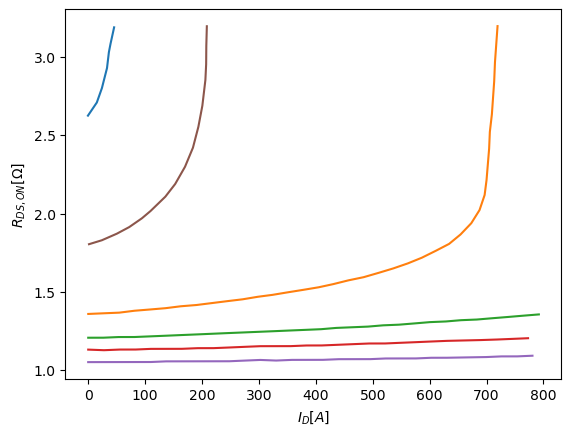

In [184]:
fig, ax = plt.subplots()
for col in df2.columns: 
    ax.plot(df2[col][df2[col].notnull()])
ax.set_xlabel(r'$I_D [A]$')
ax.set_ylabel(r'$R_{DS,ON} [\Omega]$')

In [185]:
idvds = {}
rds_calc = {}
for col in df1.columns: 
    idvds[col] = df1[col][df1[col].notnull()]
    ser = idvds[col]
    index_as_series= pd.Series(ser.index)
    index_diff = index_as_series.diff().dropna()
    rds_calc[col]=index_diff.reset_index(drop=True) / ser.diff().dropna().reset_index(drop=True)
 

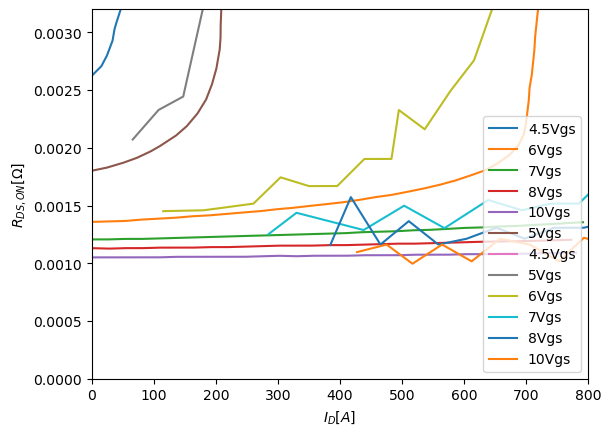

In [215]:
fig, ax = plt.subplots()
for col in df2.columns: 
    mask = df2[col].notnull()
    y = df2[col][mask]
    
    ax.plot(y.index.values, y/1000, label=col)
for key in rds_calc: 
    ax.plot(idvds[key].values[1:] , rds_calc[key].values, label=key)
    #ax.plot(rds_calc[key])
ax.set_xlabel(r'$I_D [A]$')
ax.set_ylabel(r'$R_{DS,ON} [\Omega]$')
ax.set_xlim(0, 800)
ax.set_ylim(0,.0032)
ax.legend()

In [ ]:
#create a dictionary of {label:style} 

In [284]:
random_numbers = [[0.2 + 0.8*random.random() for _ in range(3)] for _ in range(len(df1.columns)-1) ]
custom_cycler = cy(color=random_numbers)()
styles = {label: next(custom_cycler) for label in df1.columns}

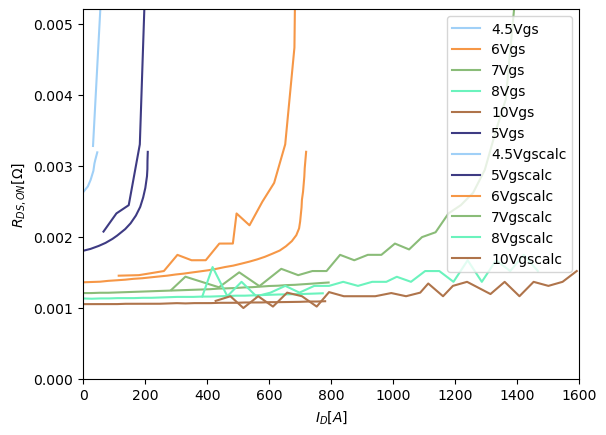

In [290]:
df2 = pd.read_csv('IPTC012N08NM5_Diagram6') 
df2.head()
df1 = pd.read_csv('IPTC012N08NM5-Diagram5') 
df1.index
idvds = {}
rds_calc = {}
for col in df1.columns: 
    if col != 'x': 
        idvds[col] = df1[[col, 'x']][df1[col].notnull()]
        ids = idvds[col][col]
        vds_diff = idvds[col]['x'].diff().dropna()
        ids_diff = idvds[col][col].diff().dropna()
        rds_calc[col]= vds_diff / ids_diff

fig, ax = plt.subplots()
#ax.set_prop_cycle(custom_cycler)
for col in df2.columns: 
    if col != 'x':
        mask = df2[col].notnull()
        y = df2[col][mask]
        x = df2['x'][mask]
        ax.plot(x, y/1000, label=col, **styles[col])
   
for key in rds_calc: 
    ax.plot(idvds[key][key][1:] , rds_calc[key].values, label=key+'calc', **styles[key])
    #ax.plot(rds_calc[key])
ax.set_xlabel(r'$I_D [A]$')
ax.set_ylabel(r'$R_{DS,ON} [\Omega]$')
ax.set_xlim(0, 1600)
ax.set_ylim(0,.0052)
ax.legend()